# PIA

Integrantes

1. Miriam Itzel Cordova Tulley - 2077877
2. Heidi Siboney Martínez Reyna -1950535
3. Silvia Navarro Ruíz - 1945897
4. Cynthia Lourdes Escamilla Loperena - 1957170

## Importar librerías y datos de kaggle




In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import sklearn.model_selection
import pandas as pd
import numpy as np
import glob
from PIL import Image
from tensorflow.data import Dataset
import tensorflow.io as tfio

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

In [ ]:
!unzip augmented-alzheimer-mri-dataset.zip

In [7]:
folder_path0='/content/AugmentedAlzheimerDataset/NonDemented'
folder_path1='/content/AugmentedAlzheimerDataset/VeryMildDemented'
folder_path2='/content/AugmentedAlzheimerDataset/MildDemented'
folder_path3='/content/AugmentedAlzheimerDataset/ModerateDemented'

In [8]:
image_files0=glob.glob(folder_path0+'/*.jpg')
image_files1=glob.glob(folder_path1+'/*.jpg')
image_files2=glob.glob(folder_path2+'/*.jpg')
image_files3=glob.glob(folder_path3+'/*.jpg')

## Asignar datos y etiquetas en listas

In [9]:
images=[]
labels=[]

for image_file in image_files0:
    image=Image.open(image_file)
    images.append(image)
    labels.append(0)

for image_file in image_files1:
    image=Image.open(image_file)
    images.append(image)
    labels.append(1)

for image_file in image_files2:
    image=Image.open(image_file)
    images.append(image)
    labels.append(2)

for image_file in image_files3:
    image=Image.open(image_file)
    images.append(image)
    labels.append(3)

### Preprocesamiento

In [10]:
# Create a list of image paths and labels
image_paths = image_files0 + image_files1 + image_files2 + image_files3
labels = [0] * len(image_files0) + [1] * len(image_files1) + [2] * len(image_files2) + [3] * len(image_files3)

In [11]:
# Preprocess function
def preprocess(imagePath, label):
    image = tf.io.read_file(imagePath)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image, (64, 64))
    image = image / 255.0
    return image, label

In [12]:
# Apply preprocess function to image paths and labels
data = list(zip(image_paths, labels))
data = [preprocess(imagePath, label) for imagePath, label in data]

Slip en imagenes de train y test

2


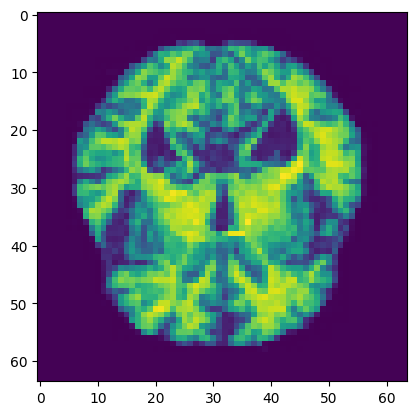

In [13]:
imgs_train, imgs_test, lbls_train, lbls_test = sklearn.model_selection.train_test_split(
    [image for image, _ in data], [label for _, label in data], test_size=0.3, random_state=42
)

plt.imshow(imgs_train[0])
print(lbls_train[0])

In [14]:
imgs_train = np.array(imgs_train)
imgs_test = np.array(imgs_test)
lbls_train = np.array(lbls_train)
lbls_test = np.array(lbls_test)

### Creación del modelo

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

### Compilación del modelo

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Entrenamiento

In [21]:
history = model.fit(imgs_train, lbls_train, epochs=10,
                    validation_data=(imgs_test, lbls_test))

Epoch 1/10
744/744 [==============================] - 177s 236ms/step - loss: 0.9070 - accuracy: 0.5721 - val_loss: 0.6823 - val_accuracy: 0.6857
Epoch 2/10
744/744 [==============================] - 172s 232ms/step - loss: 0.5868 - accuracy: 0.7413 - val_loss: 0.5386 - val_accuracy: 0.7646
Epoch 3/10
744/744 [==============================] - 169s 227ms/step - loss: 0.4371 - accuracy: 0.8154 - val_loss: 0.4870 - val_accuracy: 0.7962
Epoch 4/10
744/744 [==============================] - 170s 228ms/step - loss: 0.3291 - accuracy: 0.8692 - val_loss: 0.3775 - val_accuracy: 0.8440
Epoch 5/10
744/744 [==============================] - 163s 219ms/step - loss: 0.2547 - accuracy: 0.8992 - val_loss: 0.3209 - val_accuracy: 0.8752
Epoch 6/10
744/744 [==============================] - 170s 229ms/step - loss: 0.1942 - accuracy: 0.9240 - val_loss: 0.3060 - val_accuracy: 0.8811
Epoch 7/10
744/744 [==============================] - 165s 221ms/step - loss: 0.1483 - accuracy: 0.9432 - val_loss: 0.3257 -

### Evalucion del modelo

319/319 - 14s - loss: 0.3383 - accuracy: 0.8962 - 14s/epoch - 45ms/step


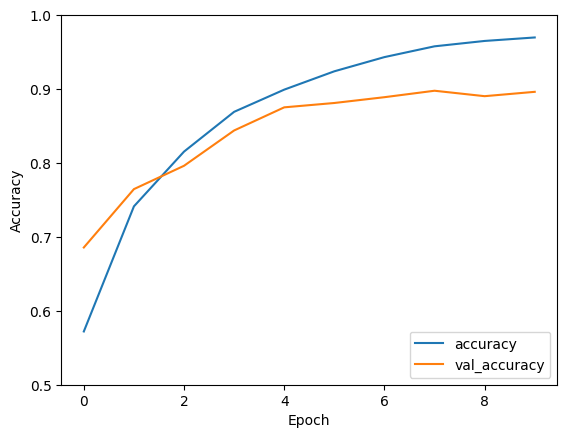

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imgs_test,  lbls_test, verbose=2)

### Predicciones

In [23]:
predictions = model.predict(imgs_test)

319/319 [==============================] - 17s 55ms/step


In [24]:
predictions[0]

array([7.8351721e-02, 9.2164832e-01, 5.4815406e-08, 1.2362533e-14],
      dtype=float32)

In [25]:
np.argmax(predictions[0])

1

In [26]:
lbls_test[0]

1

In [27]:
class_names = ['Non Demented', 'Very Mild Demented', 'Mild Demented', 'Moderate Demented']

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

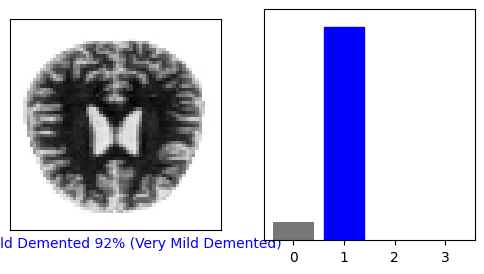

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], lbls_test, imgs_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  lbls_test)
plt.show()

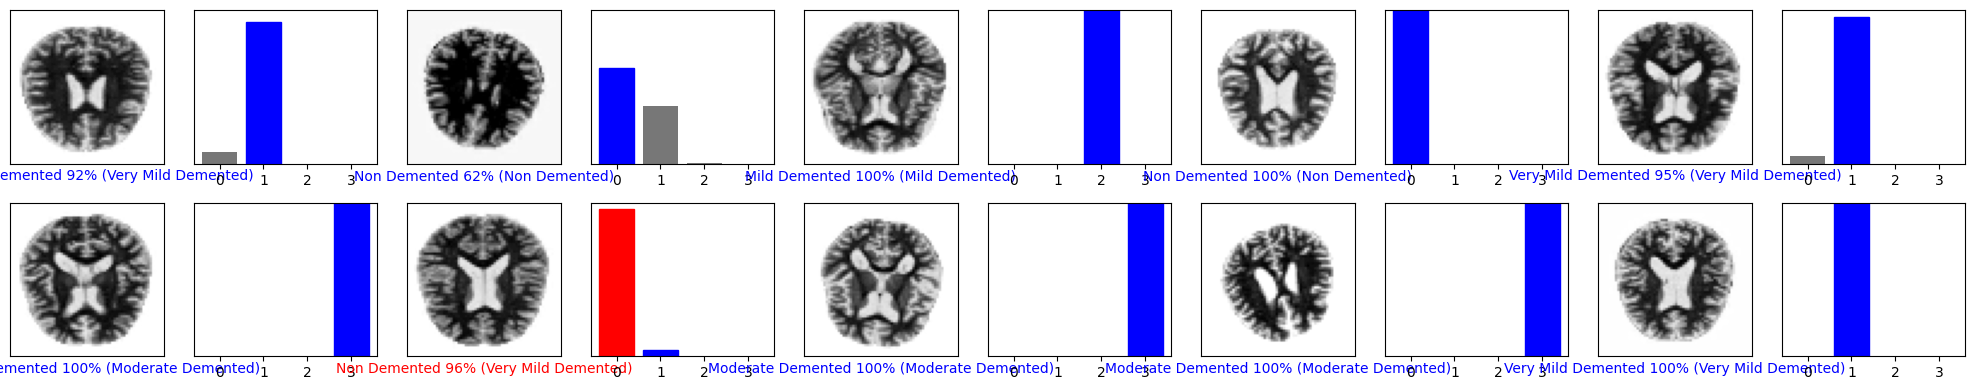

In [32]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], lbls_test, imgs_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], lbls_test)
plt.tight_layout()
plt.show()